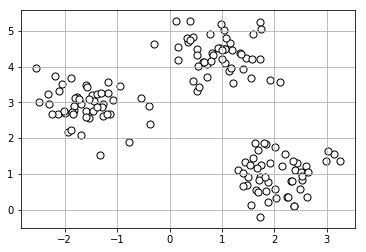

In [101]:
from sklearn.datasets import make_blobs

# ランダムに150個の点を生成する
X, y = make_blobs(n_samples=150,    # 点の個数
                  n_features=2,     # 特徴量の個数（２次元）
                  centers=3,        # クラスタの個数
                  cluster_std=0.5,  # クラスタ内の標準偏差
                  shuffle=True,
                  random_state=0)   # 乱数生成器の状態を指定


# ２次元の散布図にまとめる
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c='white', edgecolors='black', marker='o', s=50)
plt.grid()
plt.show()

In [102]:
# k-means法のモデルを生成
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数
            #init='random',  # セントロイドの書記長
            init='k-means++',
            n_init=10,      # 実行回数
            max_iter=300,   # 最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0) # セントロイドの初期値に用いる乱数生成器の状態
y_km = km.fit_predict(X)

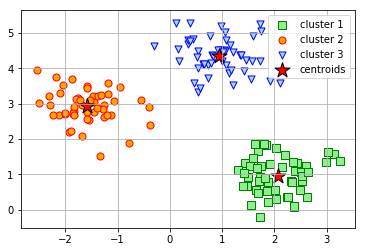

In [103]:
# クラスタとセントロイドをプロットする

plt.scatter(X[y_km==0, 0],  # グラフのxの値
            X[y_km==0, 1],  # グラフのyの値
            s=50,
            c='lightgreen',
            edgecolors='green',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_km==1, 0],
            X[y_km==1, 1],
            s=50,
            c='orange',
            edgecolors='red',
            marker='o',
            label='cluster 2')

plt.scatter(X[y_km==2, 0],
            X[y_km==2, 1],
            s=50,
            c='lightblue',
            edgecolors='blue',
            marker='v',
            label='cluster 3')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            c='red',
            edgecolors='black',
            marker='*',
            label='centroids')

plt.legend()
plt.grid()
plt.show()

In [104]:
# クラスタ内SSE（誤差平方和）
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


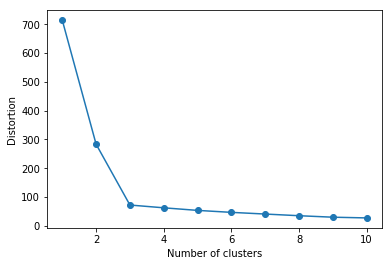

In [105]:
# elbow methodにより、最適なクラスタ数kを求める

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

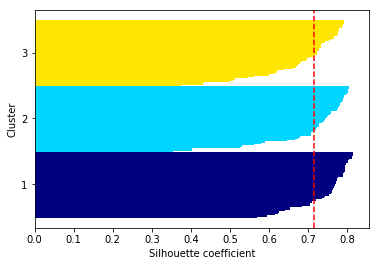

In [106]:
# シルエット解析

km = KMeans(n_clusters=3,   # クラスタの個数
            init='k-means++',  # セントロイドの書記長
            n_init=10,      # 実行回数
            max_iter=300,   # 最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0) # セントロイドの初期値に用いる乱数生成器の状態
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# シルエット係数を計算
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

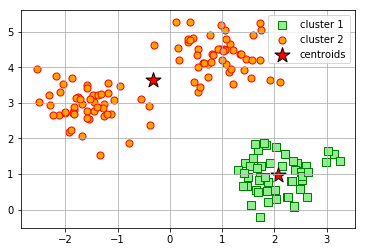

In [107]:
# 悪いクラスタリング数に対するシルエット図

km = KMeans(n_clusters=2,   # クラスタの個数
            init='k-means++',  # セントロイドの書記長
            n_init=10,      # 実行回数
            max_iter=300,   # 最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0) # セントロイドの初期値に用いる乱数生成器の状態
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0, 0],  # グラフのxの値
            X[y_km==0, 1],  # グラフのyの値
            s=50,
            c='lightgreen',
            edgecolors='green',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_km==1, 0],
            X[y_km==1, 1],
            s=50,
            c='orange',
            edgecolors='red',
            marker='o',
            label='cluster 2')

"""
plt.scatter(X[y_km==2, 0],
            X[y_km==2, 1],
            s=50,
            c='lightblue',
            edgecolors='blue',
            marker='v',
            label='cluster 3')
"""

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            c='red',
            edgecolors='black',
            marker='*',
            label='centroids')

plt.legend()
plt.grid()
plt.show()

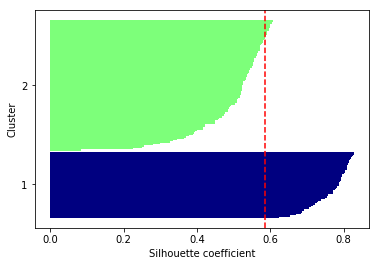

In [108]:
# 悪いシルエット図を描画

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# シルエット係数を計算
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
# 最適なクラスタリングでないことがわかる

In [109]:
# 階層型クラスタリング

In [110]:
# ランダムなサンプルデータを生成

import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

# ５行３列のサンプルデータを生成
X = np.random.random_sample([5,3])*10

df = pd.DataFrame(X, columns=variables, index=labels)

df

X         Y         Z
ID_0  6.964692  2.861393  2.268515
ID_1  5.513148  7.194690  4.231065
ID_2  9.807642  6.848297  4.809319
ID_3  3.921175  3.431780  7.290497
ID_4  4.385722  0.596779  3.980443

In [111]:
# 距離行列の計算

from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels, index=labels)

# 確認のため
row_dist

ID_0      ID_1      ID_2      ID_3      ID_4
ID_0  0.000000  4.973534  5.516653  5.899885  3.835396
ID_1  4.973534  0.000000  4.347073  5.104311  6.698233
ID_2  5.516653  4.347073  0.000000  7.244262  8.316594
ID_3  5.899885  5.104311  7.244262  0.000000  4.382864
ID_4  3.835396  6.698233  8.316594  4.382864  0.000000

In [112]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean')
    Performs hierarchical/agglomerative clustering.
    
    The input y may be either a 1d compressed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d compressed distance matrix,
    then y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of original
  

In [113]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

In [114]:
pd.DataFrame(row_clusters,
             columns=['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust.'],
             index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

row label 1  row label 2  distance  no. of items in clust.
cluster 1          0.0          4.0  3.835396                     2.0
cluster 2          1.0          2.0  4.347073                     2.0
cluster 3          3.0          5.0  5.899885                     3.0
cluster 4          6.0          7.0  8.316594                     5.0

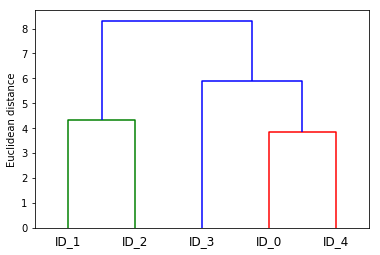

In [115]:
# 結果を樹形図として表示する

from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters,
                       labels=labels,)
plt.ylabel('Euclidean distance')
plt.show()

In [116]:
# heat map

In [117]:
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

In [118]:
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

In [119]:
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

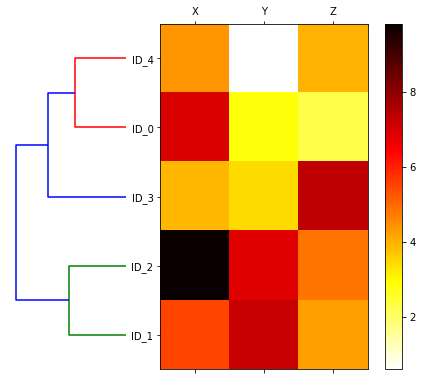

In [120]:
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
    
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [121]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


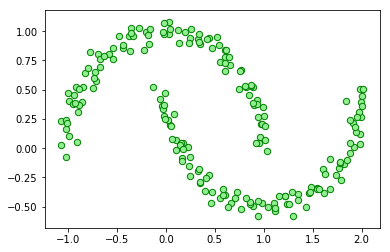

In [122]:
# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

# 100個の点からなる半月状のクラスタを二組 作成 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,    # 生成する点の総数
                  noise=0.05,       # 追加するガウスノイズの標準偏差
                  random_state=0)
plt.scatter(X[:,0], X[:,1],
            s=40,
            c='lightgreen',
            edgecolors='green',
            marker='o')
plt.show()

In [123]:
# try splitting two 半月s with k-means法 and 凝集型階層的クラスタリング（完全連結法）
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

In [124]:
# try splitting two 半月s with k-means法

km = KMeans(n_clusters=2,   # クラスタの個数
            #init='random',  # セントロイドの書記長
            #n_init=10,      # 実行回数
            #max_iter=300,   # 最大イテレーション回数
            #tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0) # セントロイドの初期値に用いる乱数生成器の状態
y_km = km.fit_predict(X)

ax1.scatter(X[y_km==0, 0],  # グラフのxの値
            X[y_km==0, 1],  # グラフのyの値
            s=60,
            c='lightgreen',
            edgecolors='blue',
            marker='o',
            label='cluster 1')

ax1.scatter(X[y_km==1, 0],
            X[y_km==1, 1],
            s=60,
            c='lightgreen',
            edgecolors='red',
            marker='s',
            label='cluster 2')

ax1.set_title('K-means clustering')

In [125]:
# try splitting two 半月s with 凝集型階層的クラスタリング（完全連結法）

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0],  # グラフのxの値
            X[y_ac==0, 1],  # グラフのyの値
            s=60,
            c='lightgreen',
            edgecolors='blue',
            marker='o',
            label='cluster 1')

ax2.scatter(X[y_ac==1, 0],
            X[y_ac==1, 1],
            s=60,
            c='lightgreen',
            edgecolors='red',
            marker='s',
            label='cluster 2')

ax2.set_title('Agglomerative clustering')

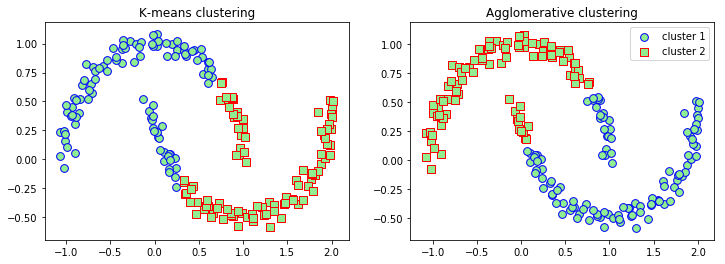

In [126]:
plt.legend()
plt.show()

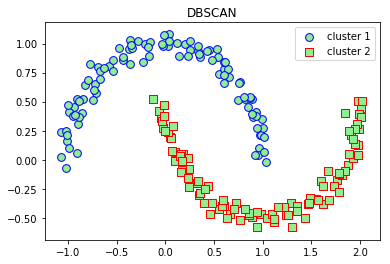

In [127]:
# try splitting two 半月s with DBSCAN

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,            # 半径
            min_samples=5,      # コア点の最小個数
            metric='euclidean') # 距離の計算方法
y_db = db.fit_predict(X)

plt.scatter(X[y_db==0, 0],  # グラフのxの値
            X[y_db==0, 1],  # グラフのyの値
            s=60,
            c='lightgreen',
            edgecolors='blue',
            marker='o',
            label='cluster 1')

plt.scatter(X[y_db==1, 0],
            X[y_db==1, 1],
            s=60,
            c='lightgreen',
            edgecolors='red',
            marker='s',
            label='cluster 2')

plt.title("DBSCAN")
plt.legend()
plt.show()

# 分類に成功している